In [1]:
import pandas as pd

df = pd.read_csv('./REC_Collaborative_Facility.csv')

table = pd.pivot_table(df, index='user', columns='item', values='rating')
table[250877].mean()

table.head()

In [24]:
dfREC = pd.read_csv('./REC.csv')

c:\Users\nburg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
dfREC = dfREC[dfREC.cleannights > 0]

In [30]:
dfREC.cleannights.min()

1

In [44]:
dfREC = dfREC[dfREC.numberofpeople > 0]

In [45]:
dfREC.numberofpeople.min()

1

In [46]:
import numpy as np

dfREC = dfREC[np.abs(dfREC.numberofpeople-dfREC.numberofpeople.mean()) <= (3*dfREC.numberofpeople.std())]

In [47]:
dfREC = dfREC[np.abs(dfREC.cleannights-dfREC.cleannights.mean()) <= (3*dfREC.cleannights.std())]

In [48]:
dfREC.shape

(2750782, 22)

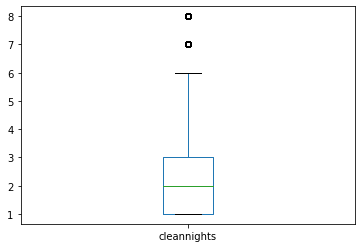

In [49]:
dfREC.cleannights.plot.box()

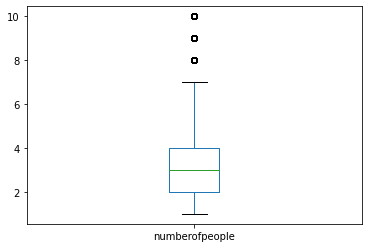

In [50]:
dfREC.numberofpeople.plot.box()

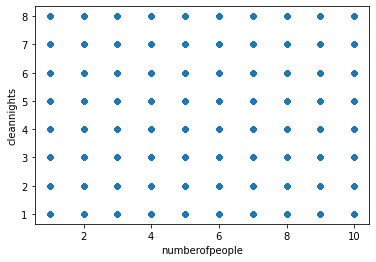

In [52]:
dfREC.plot.scatter(x='numberofpeople', y='cleannights')

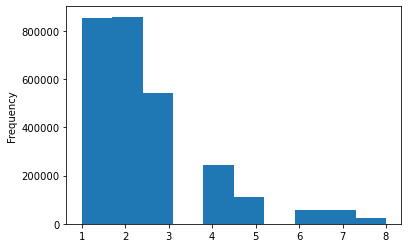

In [53]:
dfREC.cleannights.plot.hist()

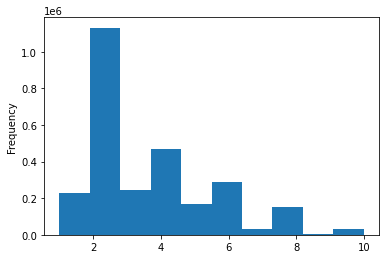

In [54]:
dfREC.numberofpeople.plot.hist()

In [55]:
dfREC.numberofpeople.describe()

count    2.750782e+06
mean     3.437624e+00
std      2.025591e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      1.000000e+01
Name: numberofpeople, dtype: float64

In [56]:
dfREC[dfREC.numberofpeople == 0]

,agency,orgid,parentlocationid,park,sitetype,usetype,productid,inventorytype,facilityid,facilityzip,...,facilitylatitude,startdate,enddate,orderdate,numberofpeople,cleanzip,cleannights,participation,user,rating


In [57]:
dfREC['participation'] = (dfREC['numberofpeople'] * dfREC['cleannights'])


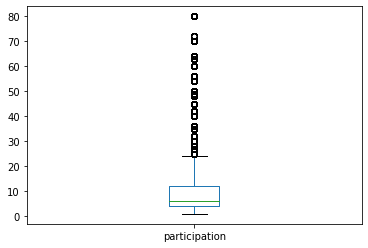

In [58]:
dfREC.participation.plot.box()

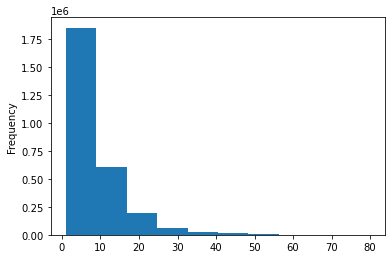

In [60]:
dfREC.participation.plot.hist()

In [64]:
from sklearn.preprocessing import quantile_transform

# break into quartiles and add 1 to the quartile to generate 1-5 rating
dfREC['rating'] = ((quantile_transform(dfREC['participation'].values.reshape(-1,1), n_quantiles=4) * 4) + 1).astype('int')

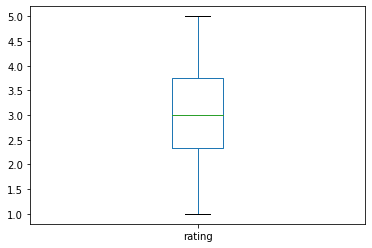

In [62]:
dfREC.rating.plot.box()

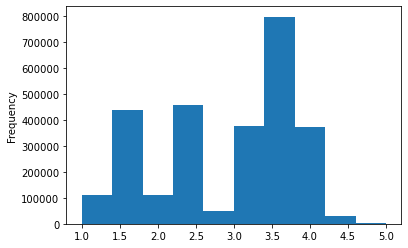

In [63]:
dfREC.rating.plot.hist()

In [66]:
dfREC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750782 entries, 0 to 2913302
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   agency             object 
 1   orgid              float64
 2   parentlocationid   object 
 3   park               object 
 4   sitetype           object 
 5   usetype            object 
 6   productid          int64  
 7   inventorytype      object 
 8   facilityid         int64  
 9   facilityzip        float64
 10  facilitystate      object 
 11  facilitylongitude  float64
 12  facilitylatitude   float64
 13  startdate          object 
 14  enddate            object 
 15  orderdate          object 
 16  numberofpeople     int64  
 17  cleanzip           int64  
 18  cleannights        int64  
 19  participation      int64  
 20  user               int64  
 21  rating             int32  
dtypes: float64(4), int32(1), int64(7), object(10)
memory usage: 472.2+ MB


In [68]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# load dataset from dataframe
reader = Reader()
data = Dataset.load_from_df(dfREC[['user', 'facilityid', 'rating']], reader)

# create SVD model
algo = SVD()

# cross validate model using RMSE
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8225  0.8237  0.8209  0.8226  0.8218  0.8223  0.0009  
MAE (testset)     0.6871  0.6883  0.6859  0.6866  0.6866  0.6869  0.0008  
Fit time          135.26  134.18  134.90  133.45  134.51  134.46  0.62    
Test time         8.64    7.24    7.07    7.70    8.67    7.86    0.68    


{'test_rmse': array([0.82250961, 0.82373991, 0.82090029, 0.8225738 , 0.8218197 ]),
 'test_mae': array([0.68710719, 0.68829983, 0.68590008, 0.6865752 , 0.68661039]),
 'fit_time': (135.2593801021576,
  134.180832862854,
  134.90123987197876,
  133.45202040672302,
  134.51474618911743),
 'test_time': (8.635576009750366,
  7.242207765579224,
  7.070482015609741,
  7.700351238250732,
  8.672428369522095)}

In [69]:
# create a test user in Silver Spring, MD
uid = str(20901)

# get prediction for Assateague, MD
prediction = algo.predict(uid, str(232507))
prediction.est

2.3708926460016375

In [70]:
# get prediction for Matthews Arm, VA
prediction = algo.predict(uid, str(232432))
prediction.est

2.3708926460016375